In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
try:
    df = pd.read_csv("https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/epilepsy.data")
except:
    df = pd_read_csv("Epilepsy.csv")

In [3]:
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [4]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            2
Jitter:DDP          1
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [5]:
df["MDVP:PPQ"].value_counts()

MDVP:PPQ
0.00332    4
0.00283    3
0.00182    3
0.00203    3
0.00186    2
          ..
0.00354    1
0.00478    1
0.00220    1
0.00576    1
0.00317    1
Name: count, Length: 164, dtype: int64

In [6]:
df["Jitter:DDP"].value_counts()

Jitter:DDP
0.00507    3
0.01109    2
0.00780    2
0.00731    2
0.00994    2
          ..
0.01941    1
0.01400    1
0.01407    1
0.01601    1
0.00885    1
Name: count, Length: 180, dtype: int64

In [7]:
df["MDVP:PPQ"].fillna(value = df["MDVP:PPQ"].mean(), inplace = True)
df["Jitter:DDP"].fillna(value = df["Jitter:DDP"].mean(), inplace = True)

In [8]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [9]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003468,0.009932,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002751,0.008902,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001890,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002750,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [10]:
df["status"].value_counts()

status
1    147
0     48
Name: count, dtype: int64

In [11]:
column_to_move = df.pop("status")

# To move the "status" column at the last
df.insert(len(df.columns), 'status', column_to_move)

In [12]:
df.shape

(195, 24)

In [13]:
X = df.iloc[:,1:23]
y = df.iloc[:,-1]

In [14]:
X.shape

(195, 22)

In [15]:
y

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

## Feature Selection

In [17]:
from sklearn.ensemble import RandomForestClassifier
from mlxtend.feature_selection import SequentialFeatureSelector

In [18]:
# Because we want our model to predict the epilepsy disease
# So we want to keep the false negative as low as possible
# So here we are selecting features based on recall score
forward_feature_selection = SequentialFeatureSelector(RandomForestClassifier(n_jobs=-1),
                                                      k_features= 6,
                                                      forward=True,
                                                      floating=False,
                                                      verbose=2,
                                                      scoring= "recall",
                                                      cv= 5).fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:   16.4s finished

[2023-07-10 23:48:02] Features: 1/6 -- score: 0.9700000000000001[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:   12.1s finished

[2023-07-10 23:48:15] Features: 2/6 -- score: 0.95[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   11.5s finished

[2023-07-10 23:48:26] Features: 3/6 -- score: 0.97[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5

### With 5 features we are getting the recall accuracy 1, so we will select the 5 features

In [19]:
forward_feature_selection.k_feature_idx_

(0, 1, 4, 16, 17, 19)

In [20]:
forward_feature_selection.k_feature_names_

('MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Jitter(Abs)', 'RPDE', 'DFA', 'spread2')

In [21]:
pd.DataFrame.from_dict(forward_feature_selection.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(4,)","[1.0, 1.0, 0.95, 0.95, 0.95]",0.97,"(MDVP:Jitter(Abs),)",0.031483,0.024495,0.012247
2,"(0, 4)","[1.0, 0.95, 0.95, 0.9, 0.95]",0.95,"(MDVP:Fo(Hz), MDVP:Jitter(Abs))",0.040644,0.031623,0.015811
3,"(0, 4, 19)","[0.95, 1.0, 1.0, 0.9, 1.0]",0.97,"(MDVP:Fo(Hz), MDVP:Jitter(Abs), spread2)",0.051412,0.04,0.02
4,"(0, 4, 17, 19)","[1.0, 1.0, 1.0, 0.95, 1.0]",0.99,"(MDVP:Fo(Hz), MDVP:Jitter(Abs), DFA, spread2)",0.025706,0.02,0.01
5,"(0, 1, 4, 17, 19)","[1.0, 1.0, 1.0, 1.0, 1.0]",1.0,"(MDVP:Fo(Hz), MDVP:Fhi(Hz), MDVP:Jitter(Abs), ...",0.0,0.0,0.0
6,"(0, 1, 4, 16, 17, 19)","[1.0, 1.0, 1.0, 1.0, 1.0]",1.0,"(MDVP:Fo(Hz), MDVP:Fhi(Hz), MDVP:Jitter(Abs), ...",0.0,0.0,0.0


In [22]:
# Independent variables
X = df[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Jitter(Abs)', 'DFA', 'spread2']]

In [23]:
X

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Jitter(Abs),DFA,spread2
0,119.992,157.302,0.00007,0.815285,0.266482
1,122.400,148.650,0.00008,0.819521,0.335590
2,116.682,131.111,0.00009,0.825288,0.311173
3,116.676,137.871,0.00009,0.819235,0.334147
4,116.014,141.781,0.00011,0.823484,0.234513
...,...,...,...,...,...
190,174.188,230.978,0.00003,0.657899,0.121952
191,209.516,253.017,0.00003,0.683244,0.129303
192,174.688,240.005,0.00008,0.655683,0.158453
193,198.764,396.961,0.00004,0.643956,0.207454


In [24]:
# Dependent Variable
y

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64

In [25]:
new_df = df[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Jitter(Abs)', 'DFA', 'spread2','status']]

<Axes: >

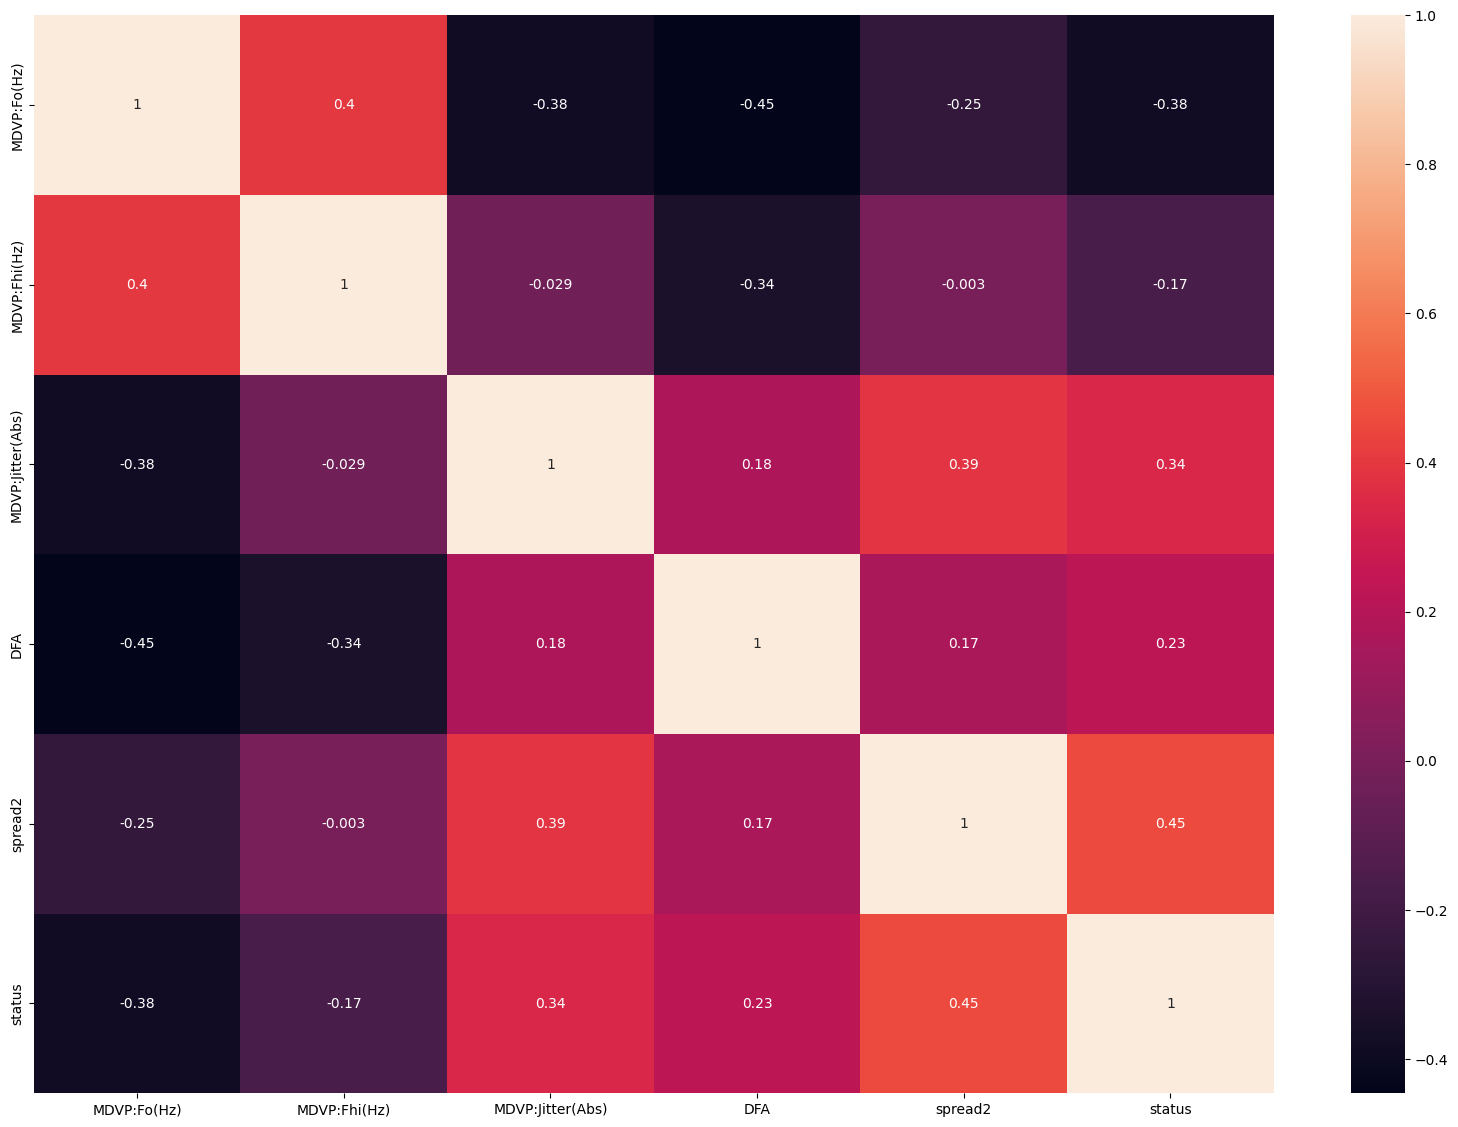

In [26]:
# Checking if these columns are not highly corelated
cor = new_df.corr()

plt.figure(figsize = (20,14))
sns.heatmap(cor,annot = True)

## KNN Classification

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25,random_state=5)

In [28]:
k_range = range(1,31)
k_scores = {}

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X, y, cv = 10, scoring = "f1")
    k_scores[k] = scores.mean()
print(k_scores)

{1: 0.8167285497430102, 2: 0.8057423275443296, 3: 0.8690943420378904, 4: 0.8570877892860651, 5: 0.8833272272740963, 6: 0.8616431672611743, 7: 0.8807803738679549, 8: 0.8807803738679549, 9: 0.8868120757589448, 10: 0.8788550865116331, 11: 0.8941894206362896, 12: 0.8820766946525961, 13: 0.887721321160682, 14: 0.8709925437686674, 15: 0.8913994820802221, 16: 0.8582226598294287, 17: 0.8658417074484763, 18: 0.8621635465289362, 19: 0.866925451290841, 20: 0.8556125965519573, 21: 0.8583840163631434, 22: 0.8540764982416654, 23: 0.8596570578377978, 24: 0.8638027425855567, 25: 0.867480903505097, 26: 0.8638027425855567, 27: 0.8672118334946477, 28: 0.8638027425855567, 29: 0.8638027425855567, 30: 0.8638027425855567}


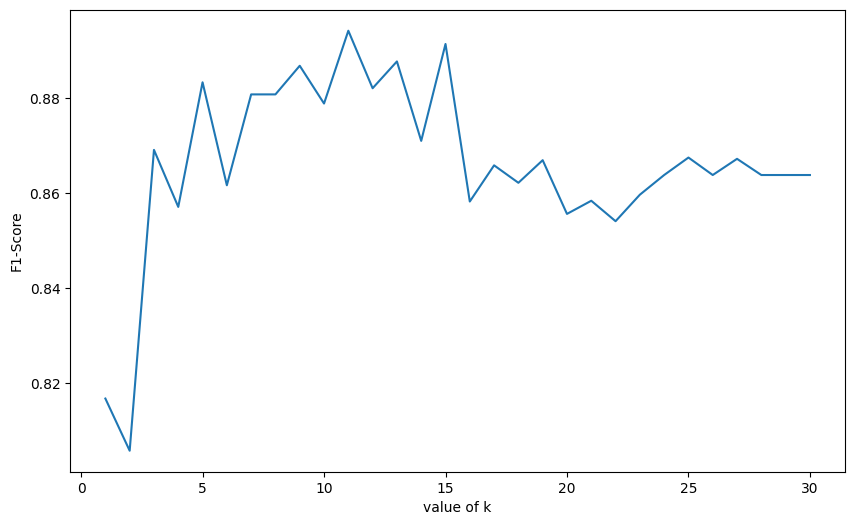

In [29]:
plt.figure(figsize = (10,6))
plt.plot(k_scores.keys(), k_scores.values())
plt.xlabel("value of k")
plt.ylabel("F1-Score")
plt.show()

In [30]:
knn = KNeighborsClassifier(n_neighbors = 11)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [31]:
y_pred = knn.predict(X_test)

In [32]:
print("Accuracy :", metrics.accuracy_score(y_test, y_pred))
print("Precision :", metrics.precision_score(y_test, y_pred))
print("Recall :", metrics.recall_score(y_test, y_pred))
print("F1 Score :", metrics.f1_score(y_test, y_pred))

Accuracy : 0.8367346938775511
Precision : 0.8333333333333334
Recall : 0.9722222222222222
F1 Score : 0.8974358974358975


In [33]:
cn = pd.crosstab(y_test, y_pred, rownames = ["actual"], colnames = ["predicted"])

<Axes: xlabel='predicted', ylabel='actual'>

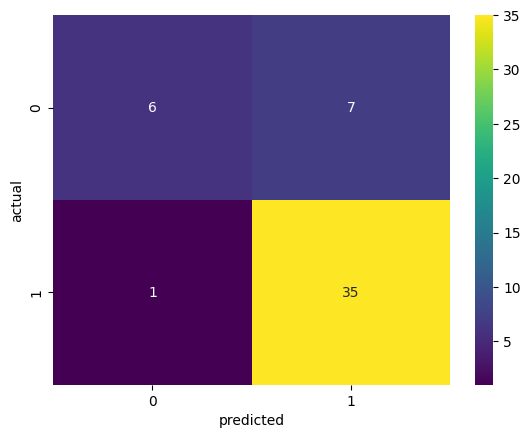

In [34]:
sns.heatmap(cn, annot = True, cmap = "viridis")


## Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
lr = LogisticRegression()

# Fitting the model
lr.fit(X_train, y_train)

LogisticRegression()

In [37]:
y_pred_LR = lr.predict(X_test)

<Axes: xlabel='predicted', ylabel='actual'>

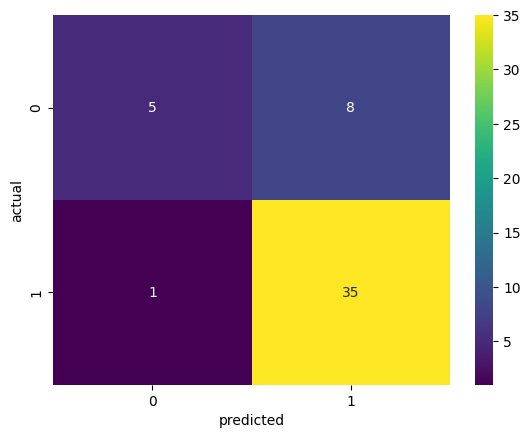

In [38]:
cm = pd.crosstab(y_test, y_pred_LR, rownames = ["actual"], colnames = ["predicted"])
sns.heatmap(cm, annot = True, cmap="viridis")

In [39]:
print("Accuracy :", metrics.accuracy_score(y_test, y_pred_LR))
print("Precision :", metrics.precision_score(y_test, y_pred_LR))
print("Recall :", metrics.recall_score(y_test, y_pred_LR))
print("F1 Score :", metrics.f1_score(y_test, y_pred_LR))

Accuracy : 0.8163265306122449
Precision : 0.813953488372093
Recall : 0.9722222222222222
F1 Score : 0.8860759493670887


## Random Forest Classification

In [40]:
crf = RandomForestClassifier(n_estimators = 100)  
  
# Training the model on the training dataset
crf.fit(X_train, y_train)
  
# performing predictions on the test dataset
y_pred_crf = crf.predict(X_test)

<Axes: xlabel='predicted', ylabel='actual'>

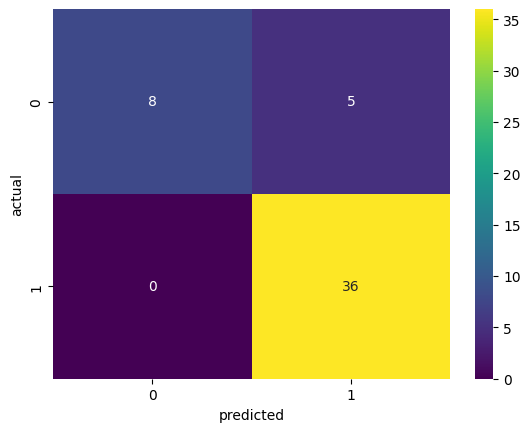

In [41]:
cm = pd.crosstab(y_test, y_pred_crf, rownames = ["actual"], colnames = ["predicted"])
sns.heatmap(cm, annot = True, cmap="viridis")

In [42]:
print("Accuracy :", metrics.accuracy_score(y_test, y_pred_crf))
print("Precision :", metrics.precision_score(y_test, y_pred_crf))
print("Recall :", metrics.recall_score(y_test, y_pred_crf))
print("F1 Score :", metrics.f1_score(y_test, y_pred_crf))

Accuracy : 0.8979591836734694
Precision : 0.8780487804878049
Recall : 1.0
F1 Score : 0.9350649350649352


## Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
tree_clf = DecisionTreeClassifier(criterion='entropy',
                                  max_depth=2)

tree_clf.fit(X_train, y_train)
y_pred_tree = crf.predict(X_test)

<Axes: xlabel='predicted', ylabel='actual'>

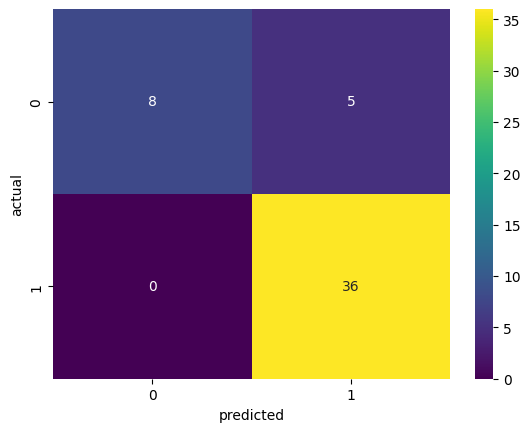

In [45]:
cm = pd.crosstab(y_test, y_pred_tree, rownames = ["actual"], colnames = ["predicted"])
sns.heatmap(cm, annot = True, cmap="viridis")

In [46]:
print("Accuracy :", metrics.accuracy_score(y_test, y_pred_tree))
print("Precision :", metrics.precision_score(y_test, y_pred_tree))
print("Recall :", metrics.recall_score(y_test, y_pred_tree))
print("F1 Score :", metrics.f1_score(y_test, y_pred_tree))

Accuracy : 0.8979591836734694
Precision : 0.8780487804878049
Recall : 1.0
F1 Score : 0.9350649350649352


# Optimal Model
### In medical dataset it is very important to reduce false Negative. So recall score should be very good.
### in both Random forest and Decision Tree we got recall score of 1.0. So these are the best models out of 4. 